In [3]:
#question to answer by this data analysis 1.)Who was being polled and what was their party affiliation?
#2.)Did the poll results favor Romney or Obama?
#3.) How do undecided voters effect the poll?
#4.) Can we account for the undecided voters? 
#5.)How did voter sentiment change over time? 
#6.) Can we see an effect in the polls from the debates?

In [4]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')
%matplotlib inline

In [5]:
from __future__ import division
import requests
from io import StringIO

In [6]:
url = "http://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv"

source = requests.get(url).text


pollData = StringIO(source)

In [7]:
pollDf = pd.read_csv(pollData)

pollDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
Pollster                  1522 non-null object
Start Date                1522 non-null object
End Date                  1522 non-null object
Entry Date/Time (ET)      1522 non-null object
Number of Observations    1013 non-null float64
Population                1522 non-null object
Mode                      1522 non-null object
Trump                     1522 non-null float64
Clinton                   1522 non-null float64
Other                     1098 non-null float64
Undecided                 1460 non-null float64
Pollster URL              1522 non-null object
Source URL                1522 non-null object
Partisan                  1522 non-null object
Affiliation               1522 non-null object
Question Text             661 non-null object
Question Iteration        1522 non-null int64
dtypes: float64(5), int64(1), object(11)
memory usage: 202.2+ KB


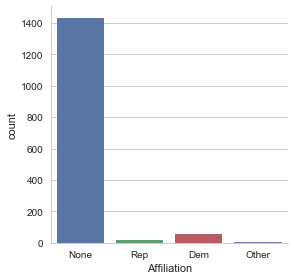

In [8]:
sb.factorplot('Affiliation',kind='count',data=pollDf)

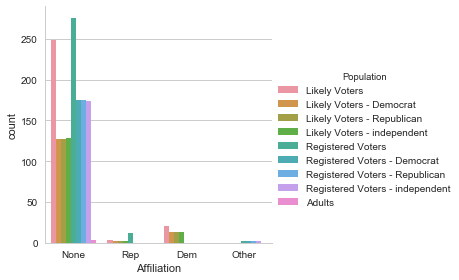

In [9]:
sb.factorplot('Affiliation',kind='count',data=pollDf,hue='Population')

In [19]:
avg = pd.DataFrame(pollDf.mean()) 
avg.drop('Number of Observations',axis=0,inplace=True)
avg

,0
Trump,40.643890
Clinton,42.733903
Other,5.806011
Undecided,9.315068
Question Iteration,1.216820


In [20]:
pollDf.mean()

Number of Observations    1916.022705
Trump                       40.643890
Clinton                     42.733903
Other                        5.806011
Undecided                    9.315068
Question Iteration           1.216820
dtype: float64

In [12]:
std = pd.DataFrame(pollDf.std())
std.head()

,0
Number of Observations,5050.240246
Trump,23.566390
Clinton,25.298731
Other,5.009533
Undecided,6.253118


In [21]:
std

,0
Trump,23.566390
Clinton,25.298731
Other,5.009533
Undecided,6.253118
Question Iteration,0.412214


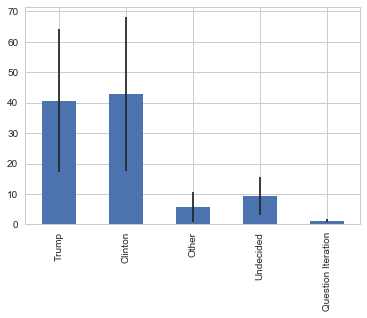

In [22]:
avg.plot(yerr=std,kind='bar',legend=False)

In [23]:
poll_avg = pd.concat([avg,std],axis=1) 
poll_avg.columns = ['Average','STD']

In [24]:
poll_avg

,Average,STD
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Other,5.806011,5.009533
Undecided,9.315068,6.253118
Question Iteration,1.216820,0.412214


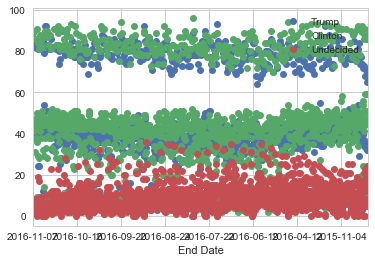

In [25]:
pollDf.plot(x='End Date',y=['Trump','Clinton','Undecided'],marker='o',linestyle='')

In [26]:
from datetime import datetime

In [27]:
pollDf['Difference'] = (pollDf.Trump - pollDf.Clinton)/100
pollDf.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.04
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.83
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.75
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.05
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1,0.02


In [28]:
pollDf = pollDf.groupby(['Start Date'],as_index=False).mean()
pollDf.head()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
0,2015-05-19,1046.00,34.25,48.75,2.5,14.00,1.0,-0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,17.75,1.0,-0.1225
2,2015-06-21,1005.00,34.00,51.00,3.0,12.00,1.0,-0.1700
3,2015-06-26,890.00,36.75,57.00,6.0,0.00,1.0,-0.2025
4,2015-07-09,499.25,35.25,49.50,NaN,16.00,1.0,-0.1425


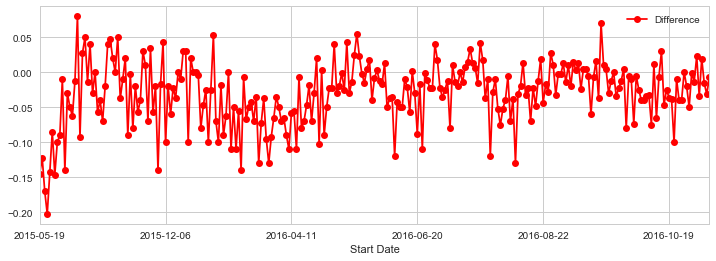

In [29]:
fig = pollDf.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='red')

In [30]:
row_in = 0
xlimit = []

for date in pollDf['Start Date']:
    if date[0:7] == '2016-06':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in += 1
        
print(min(xlimit)) 
print(max(xlimit)) 

134
158


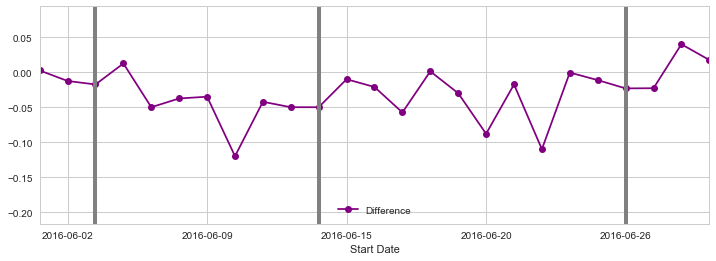

In [32]:
fig = pollDf.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(134,158))

#debates
plt.axvline(x=134+2, linewidth=4, color='grey')
plt.axvline(x=134+10, linewidth=4, color='grey')
plt.axvline(x=134+21, linewidth=4, color='grey')

In [37]:
#Donors data
#The questions we will be trying to answer while looking at this Data Set is:

#1.) How much was donated and what was the average donation?
#2.) How did the donations differ between candidates?
#3.) How did the donations differ between Democrats and Republicans?
#4.) What were the demographics of the donors?
#5.) Is there a pattern to donation amounts?
#  http://classic.fec.gov/disclosurep/PDownload.do

In [35]:
donor_df = pd.read_csv('P00000001-ALL.csv')
donor_df.info()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
Index: 7440252 entries, C00458844 to C00623884
Data columns (total 18 columns):
cmte_id              object
cand_id              object
cand_nm              object
contbr_nm            object
contbr_city          object
contbr_st            object
contbr_zip           object
contbr_employer      object
contbr_occupation    float64
contb_receipt_amt    object
contb_receipt_dt     object
receipt_desc         object
memo_cd              object
memo_text            object
form_tp              int64
file_num             object
tran_id              object
election_tp          float64
dtypes: float64(2), int64(1), object(15)
memory usage: 1.1+ GB


In [36]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
C00458844,P60006723,"Rubio, Marco","BLUM, MAUREEN",WASHINGTON,20,DC,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.0,15-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1152124,P2016,NaN
C00458844,P60006723,"Rubio, Marco","DODSON, MARK B. MR.",ATLANTA,30,GA,MORTGAGE CAPITAL ADVISORS,PRIVATE MORTGAGE BANKING,25.0,16-MAR-16,NaN,NaN,DEBT RETIREMENT,SA17A,1082559,SA17.1153048,P2016,NaN
C00458844,P60006723,"Rubio, Marco","CHILDERS, WILLIAM",DPO,AE,098309998,DIPLOMAT,US GOVERNMENT,100.0,20-FEB-16,NaN,NaN,NaN,SA17A,1056862,SA17.1020839,P2016,NaN
C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,090960009,US ARMY,PHYSICIAN,200.0,10-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1078677,P2016,NaN
C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,090960009,US ARMY,PHYSICIAN,100.0,08-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1074981,P2016,NaN


In [39]:
donor_df['contbr_occupation'].value_counts()

 25.00      1051165
 50.00       885354
 100.00      785577
 10.00       637262
 5.00        434221
 15.00       327665
 27.00       313461
 250.00      278865
 35.00       150087
 20.00       142855
 200.00      133909
 40.00       125064
 19.00       120481
 500.00      118679
 80.00       103486
 8.00        102787
 75.00        95509
 2700.00      90866
 28.00        85847
 1000.00      83443
 3.00         76709
 38.00        69111
 1.00         57444
 30.00        55169
 150.00       50352
 37.00        39914
 400.00       34955
 16.00        27659
 7.00         25740
 300.00       23758
             ...   
 227.93           1
-1564.34          1
-8.70             1
 102.26           1
 102.24           1
 9.66             1
 420.48           1
 183.46           1
 225.57           1
 1730.00          1
 960.56           1
 225.82           1
-975.44           1
-5700.00          1
 224.93           1
-133.55           1
-79.05            1
 33.46            1
 1732.00          1


In [40]:
don_mean = donor_df['contbr_occupation'].mean()

don_std = donor_df['contbr_occupation'].std()
#ecat type
print ('The average donation was %.2f with a std of %.2f' %(don_mean,don_std))

The average donation was 126.13 with a std of 7623.13


In [41]:
top_donor = donor_df['contbr_occupation'].copy()

top_donor.sort()
top_donor

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


C00577130      -93308.00
C00580100      -84236.80
C00575795      -20000.00
C00573519      -18100.00
C00573519      -18100.00
C00573519      -18100.00
C00580100      -17705.00
C00574624      -16600.00
C00573519      -16300.00
C00574624      -13500.00
C00573519      -13000.00
C00573519      -12242.00
C00577130      -12000.00
C00573519      -11700.00
C00573519      -11500.00
C00573519      -10800.00
C00574624      -10800.00
C00577130      -10500.00
C00577130      -10200.00
C00580100      -10100.00
C00574624      -10100.00
C00458844      -10000.00
C00577130      -10000.00
C00573519      -10000.00
C00458844      -10000.00
C00580100       -9520.00
C00580100       -9300.00
C00574624       -9200.00
C00580100       -8900.00
C00577130       -8460.00
                ...     
C00581876       16200.00
C00573519       18000.00
C00575795       20000.00
C00581876       20000.00
C00581876       25000.00
C00581876       29100.00
C00580100       86936.80
C00575795      974215.27
C00575795     1467070.94


In [42]:
top_donor = top_donor[top_donor >0]

top_donor.sort()

top_donor.value_counts().head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


25.0     1051165
50.0      885354
100.0     785577
10.0      637262
5.0       434221
15.0      327665
27.0      313461
250.0     278865
35.0      150087
20.0      142855
Name: contbr_occupation, dtype: int64

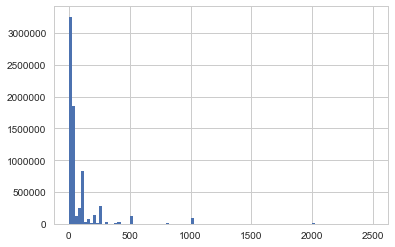

In [43]:
com_don = top_donor[top_donor < 2500]
com_don.hist(bins=100)

In [45]:
candidates = donor_df.cand_id.unique()

candidates

array(['Rubio, Marco', 'Santorum, Richard J.', 'Perry, James R. (Rick)',
       'Carson, Benjamin S.', "Cruz, Rafael Edward 'Ted'", 'Paul, Rand',
       'Clinton, Hillary Rodham', 'Sanders, Bernard', 'Fiorina, Carly',
       'Huckabee, Mike', 'Pataki, George E.', "O'Malley, Martin Joseph",
       'Graham, Lindsey O.', 'Bush, Jeb', 'Trump, Donald J.',
       'Jindal, Bobby', 'Christie, Christopher J.', 'Walker, Scott',
       'Stein, Jill', 'Webb, James Henry Jr.', 'Kasich, John R.',
       'Gilmore, James S III', 'Lessig, Lawrence', 'Johnson, Gary',
       'McMullin, Evan'], dtype=object)

In [46]:
party_map = {'Rubio, Marco': 'Republican',
           'Santorum, Richard J.': 'Republican',
           'Perry, James R.': 'Republican',
           'Carson, Benjamin S.': 'Republican',
           'Cruz, Rafael Edward': 'Republican',
           'Paul, Rand': 'Republican',
           'Clinton, Hillary Rodham': 'Democrat',
           'Sanders, Bernard': 'Democrat',
           'Fiorina, Carly': 'Republican',
           'Huckabee, Mike': 'Republican',
           'Pataki, George E.': 'Republican',
           "O'Malley, Martin Joseph": 'Democrat',
           'Graham, Lindsey O.': 'Republican',
             'Bush, Jeb': 'Republican',
             'Trump, Donald J.': 'Republican',
             'Jindal, Bobby': 'Republican',
                      
           'Christie, Christopher J.': 'Republican',
             'Walker, Scott': 'Republican',
             'Stein, Jill': 'Green',
             'Webb, James Henry Jr.': 'Democrat',
            
                      
           'Kasich, John R.': 'Republican',
             'Gilmore, James S III': 'Republican',
             'Lessig, Lawrence': 'Democrat',
             'Johnson, Gary': 'Libertarian',
             'McMullin, Evan': 'Independent'}


donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [48]:
# Clear refunds
donor_df = donor_df[donor_df.contbr_occupation >0]

# Preview DataFrame
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp,Party
C00458844,P60006723,"Rubio, Marco","BLUM, MAUREEN",WASHINGTON,20,DC,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.0,15-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1152124,P2016,NaN,NaN
C00458844,P60006723,"Rubio, Marco","DODSON, MARK B. MR.",ATLANTA,30,GA,MORTGAGE CAPITAL ADVISORS,PRIVATE MORTGAGE BANKING,25.0,16-MAR-16,NaN,NaN,DEBT RETIREMENT,SA17A,1082559,SA17.1153048,P2016,NaN,NaN
C00458844,P60006723,"Rubio, Marco","CHILDERS, WILLIAM",DPO,AE,098309998,DIPLOMAT,US GOVERNMENT,100.0,20-FEB-16,NaN,NaN,NaN,SA17A,1056862,SA17.1020839,P2016,NaN,NaN
C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,090960009,US ARMY,PHYSICIAN,200.0,10-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1078677,P2016,NaN,NaN
C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,090960009,US ARMY,PHYSICIAN,100.0,08-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1074981,P2016,NaN,NaN


In [51]:
donor_df.groupby('cand_id')['contbr_occupation'].count()

cand_id
Bush, Jeb                      28038
Carson, Benjamin S.           244904
Christie, Christopher J.        5838
Clinton, Hillary Rodham      3471128
Cruz, Rafael Edward 'Ted'     541088
Fiorina, Carly                 27536
Gilmore, James S III              84
Graham, Lindsey O.              3926
Huckabee, Mike                  6360
Jindal, Bobby                    761
Johnson, Gary                  13400
Kasich, John R.                25212
Lessig, Lawrence                1337
McMullin, Evan                  2569
O'Malley, Martin Joseph         5250
Pataki, George E.                343
Paul, Rand                     32196
Perry, James R. (Rick)           875
Rubio, Marco                   99259
Sanders, Bernard             2047595
Santorum, Richard J.            1675
Stein, Jill                    11014
Trump, Donald J.              762871
Walker, Scott                   6656
Webb, James Henry Jr.            800
Name: contbr_occupation, dtype: int64

In [52]:
# Groupby candidate and then displayt the total amount donated
donor_df.groupby('cand_id')['contbr_occupation'].sum()

cand_id
Bush, Jeb                    3.377373e+07
Carson, Benjamin S.          2.901400e+07
Christie, Christopher J.     8.214280e+06
Clinton, Hillary Rodham      5.219518e+08
Cruz, Rafael Edward 'Ted'    6.975275e+07
Fiorina, Carly               6.693845e+06
Gilmore, James S III         1.055607e+05
Graham, Lindsey O.           4.632862e+06
Huckabee, Mike               2.499978e+06
Jindal, Bobby                1.275393e+06
Johnson, Gary                3.584074e+06
Kasich, John R.              1.475268e+07
Lessig, Lawrence             6.242195e+05
McMullin, Evan               5.534083e+05
O'Malley, Martin Joseph      4.064948e+06
Pataki, George E.            5.073494e+05
Paul, Rand                   6.314863e+06
Perry, James R. (Rick)       1.189868e+06
Rubio, Marco                 4.054208e+07
Sanders, Bernard             9.757201e+07
Santorum, Richard J.         1.139075e+06
Stein, Jill                  2.493803e+06
Trump, Donald J.             1.275786e+08
Walker, Scott             

In [53]:
# Start by setting the groupby as an object
cand_amount = donor_df.groupby('cand_id')['contbr_occupation'].sum()

# Our index
i = 0

for don in cand_amount:
    print(" The candidate %s raised %.0f dollars " %(cand_amount.index[i],don))
    print ('\n')
    i += 1

 The candidate Bush, Jeb raised 33773733 dollars 


 The candidate Carson, Benjamin S. raised 29014000 dollars 


 The candidate Christie, Christopher J. raised 8214280 dollars 


 The candidate Clinton, Hillary Rodham raised 521951750 dollars 


 The candidate Cruz, Rafael Edward 'Ted' raised 69752747 dollars 


 The candidate Fiorina, Carly raised 6693845 dollars 


 The candidate Gilmore, James S III raised 105561 dollars 


 The candidate Graham, Lindsey O. raised 4632862 dollars 


 The candidate Huckabee, Mike raised 2499978 dollars 


 The candidate Jindal, Bobby raised 1275393 dollars 


 The candidate Johnson, Gary raised 3584074 dollars 


 The candidate Kasich, John R. raised 14752678 dollars 


 The candidate Lessig, Lawrence raised 624220 dollars 


 The candidate McMullin, Evan raised 553408 dollars 


 The candidate O'Malley, Martin Joseph raised 4064948 dollars 


 The candidate Pataki, George E. raised 507349 dollars 


 The candidate Paul, Rand raised 6314863 dollars 

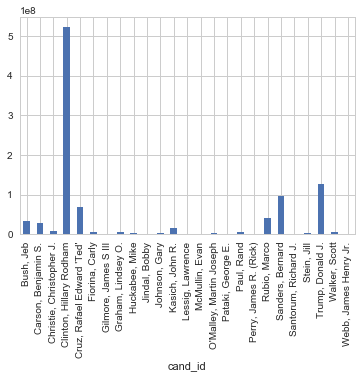

In [54]:
 # PLot out total donation amounts
cand_amount.plot(kind='bar')

In [59]:
donor_df.groupby('Party')['contbr_occupation'].sum().plot(kind='bar')

TypeError: Empty 'DataFrame': no numeric data to plot

In [63]:
occupation_df = donor_df.pivot_table('contbr_occupation',
                                index='contbr_employer',
                                columns='Party', aggfunc='sum')



In [64]:
occupation_df.shape

(0, 0)

In [65]:
occupation_df.head(20)

contbr_employer


In [66]:
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]
occupation_df.shape

occupation_df.plot(kind='bar')

TypeError: Empty 'DataFrame': no numeric data to plot

In [67]:

occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')

TypeError: Empty 'DataFrame': no numeric data to plot

In [68]:
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

ValueError: labels ['INFORMATION REQUESTED PER BEST EFFORTS' 'INFORMATION REQUESTED'] not contained in axis

In [69]:
# Set new ceo row as sum of the current two
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
# Drop CEO
occupation_df.drop('C.E.O.',inplace=True)

KeyError: 'the label [CEO] is not in the [index]'

In [70]:
 occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')

TypeError: Empty 'DataFrame': no numeric data to plot